<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#FFTの応用" data-toc-modified-id="FFTの応用-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>FFTの応用</a></span><ul class="toc-item"><li><span><a href="#周波数分解" data-toc-modified-id="周波数分解-1.1"><span class="toc-item-num">1.1&nbsp;&nbsp;</span>周波数分解</a></span></li><li><span><a href="#python-code" data-toc-modified-id="python-code-1.2"><span class="toc-item-num">1.2&nbsp;&nbsp;</span>python code</a></span></li><li><span><a href="#高周波フィルター" data-toc-modified-id="高周波フィルター-1.3"><span class="toc-item-num">1.3&nbsp;&nbsp;</span>高周波フィルター</a></span></li><li><span><a href="#python-code" data-toc-modified-id="python-code-1.4"><span class="toc-item-num">1.4&nbsp;&nbsp;</span>python code</a></span></li></ul></li><li><span><a href="#FFTの動作原理" data-toc-modified-id="FFTの動作原理-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>FFTの動作原理</a></span></li><li><span><a href="#関数内挿としてのFourier関数系" data-toc-modified-id="関数内挿としてのFourier関数系-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>関数内挿としてのFourier関数系</a></span></li><li><span><a href="#直交関係からの積分による係数決定" data-toc-modified-id="直交関係からの積分による係数決定-4"><span class="toc-item-num">4&nbsp;&nbsp;</span>直交関係からの積分による係数決定</a></span></li><li><span><a href="#直接積分によるフーリエ係数" data-toc-modified-id="直接積分によるフーリエ係数-5"><span class="toc-item-num">5&nbsp;&nbsp;</span>直接積分によるフーリエ係数</a></span></li><li><span><a href="#選点直交性による計算の簡素化" data-toc-modified-id="選点直交性による計算の簡素化-6"><span class="toc-item-num">6&nbsp;&nbsp;</span>選点直交性による計算の簡素化</a></span><ul class="toc-item"><li><ul class="toc-item"><li><ul class="toc-item"><li><span><a href="#直交関数系の選点直交性" data-toc-modified-id="直交関数系の選点直交性-6.0.0.1"><span class="toc-item-num">6.0.0.1&nbsp;&nbsp;</span>直交関数系の選点直交性</a></span></li></ul></li></ul></li><li><span><a href="#選点直交性を用いた結果" data-toc-modified-id="選点直交性を用いた結果-6.1"><span class="toc-item-num">6.1&nbsp;&nbsp;</span>選点直交性を用いた結果</a></span></li></ul></li><li><span><a href="#高速フーリエ変換アルゴリズムによる高速化" data-toc-modified-id="高速フーリエ変換アルゴリズムによる高速化-7"><span class="toc-item-num">7&nbsp;&nbsp;</span>高速フーリエ変換アルゴリズムによる高速化</a></span></li><li><span><a href="#FFT関数を用いた結果" data-toc-modified-id="FFT関数を用いた結果-8"><span class="toc-item-num">8&nbsp;&nbsp;</span>FFT関数を用いた結果</a></span></li><li><span><a href="#課題と解答例" data-toc-modified-id="課題と解答例-9"><span class="toc-item-num">9&nbsp;&nbsp;</span>課題と解答例</a></span><ul class="toc-item"><li><span><a href="#合成波のFFT" data-toc-modified-id="合成波のFFT-9.1"><span class="toc-item-num">9.1&nbsp;&nbsp;</span>合成波のFFT</a></span></li></ul></li></ul></div>

<br />

<div style="text-align: center;">
<font size="7">FFT(Fast Fourier Transformation)</font>
</div>
<br />
<div style="text-align: right;">
<font size="4">file:/Users/bob/Github/TeamNishitani/jupyter_num_calc/fft</font>
<br />
<font size="4">https://github.com/daddygongon/jupyter_num_calc/tree/master/notebooks_python</font>
<br />
<font size="4">cc by Shigeto R. Nishitani 2017-19 </font>
</div>






# FFTの応用



Fast Fourier Transformation(FFT)高速フーリエ変換(あるいはデジタル(離散)フーリエ変換(DFT))は，周波数分解やフィルターを初め，画像処理などの多くの分野で使われている．基本となる考え方は，直交基底による関数の内挿法である．最初にその応用例を見た後，どのような理屈でFFTが動いているかを解説する．

いくつかFFTを解説する面白い動画があります．ただ，少し高度かも．．．
1. [初音ミクを三角関数で描いてみた](https://www.youtube.com/watch?v=Gxaigb7yMbo)
1. [A visual introduction.
](https://www.youtube.com/watch?v=spUNpyF58BY)
1. [From heat flow to circle drawings](https://www.youtube.com/watch?v=r6sGWTCMz2k)

[Pythonで美しい動画を作ろう](https://qiita.com/Kohki_Mametani/items/3c7a44e2445958a5cc25#fn1)

## 周波数分解 


はじめの例は，周波数分解．先ずは，非整合な波を二つ用意しておく．

![C10_FFTplot2d1.png](figs/C10_FFTplot2d1.png)

これを重ねあわせた波を作る．

![C10_FFTplot2d2.png](figs/C10_FFTplot2d2.png)

ゆっくり変化する波に，激しく変化する波が重なっていることが読み取れる．これにFFTを掛ける
その強さを求めて，周波数で表示すると，




![C10_FFTplot2d3.png](figs/C10_FFTplot2d3.png)

もとの2つの周波数に対応するところにピークができているのが確認できる．広がりは，誤差のせい．
logplotでも良い．




## python code

scipyにあるfft, ifftを使う．

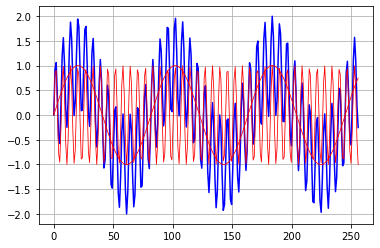

<ipython-input-9-52d5e6f2f851>:20: DeprecationWarning: Using scipy.fft as a function is deprecated and will be removed in SciPy 1.5.0, use scipy.fft.fft instead.
  out = fft(yy)


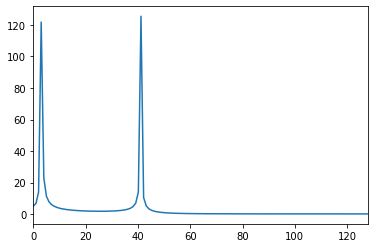

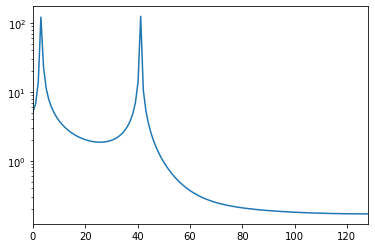

In [9]:
%matplotlib inline
from scipy import fft
import matplotlib.pyplot as plt
import numpy as np


def func(x):
    return np.sin(x/(13))+np.sin(x/(2/2))


x = np.linspace(0, 256, 256)  #0から2πまでの範囲を100分割したnumpy配列
plt.plot(x, func(x), color = 'b')
plt.plot(x, np.sin(x/(13)), color = 'r', linewidth=0.8)
plt.plot(x, np.sin(x/(2/2)), color = 'r', linewidth=0.8)

plt.grid()
plt.show()

yy = func(x)
out = fft(yy)

def spectrum_power(x):
    re, im = x.real, x.imag
    return np.sqrt(re**2+im**2)

plt.plot(x,spectrum_power(out))
plt.xlim(0,128)
plt.show()

plt.plot(x,spectrum_power(out))
plt.xlim(0,128)
plt.yscale('log')
plt.show()

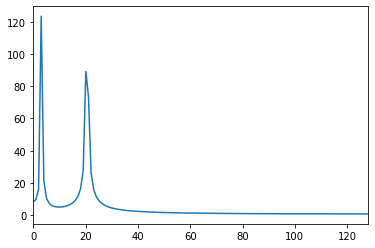
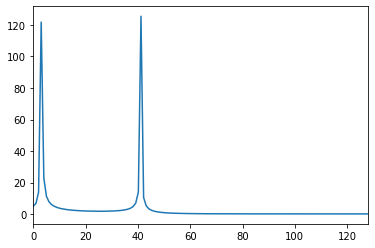

## 高周波フィルター 


次の例は，高周波フィルター．たとえば次のようなローレンツ関数を考える．
```maple
> restart;
  f1:=t->subs(a=10,b=40000,c=380,d=128,a+b/(c+(t-d)^2));
```
$$
{\it f1}\, := \,t\mapsto 10+ \frac{40000}{380+ \left( t-128 \right) ^{2} }
$$

```maple
> plot(f1(t),t=1..256);
```

![C10_FFTplot2d4.png](figs/C10_FFTplot2d4.png)


これにノイズがのると，次のようになる．
```maple
> T:=[seq(f1(i)*(0.6+0.8*evalf(rand()/10^12)),i=1..256)]:
  #T:=[seq(evalf(rand()/10^12),i=1..256)]:  #これはホワイトノイズ
  #T:=[seq(f1(i),i=1..256)]: #これは元の関数そのまま
  with(plots):
  listplot(T);
```

![C10_FFTplot2d5.png](figs/C10_FFTplot2d5.png)

これに高周波フィルターを掛けるとノイズが消えるが，その様子を示そう．先ずは，FFTを掛ける．
```maple
> Idata:=array([seq(0,i=1..256)]):
  Rdata:=convert(T,array):
  FFT(8,Rdata,Idata);
```
$$
256
$$
これは次のような強度分布をもっている．
```maple
> Adata:=[seq([i,sqrt(Idata[i]^2+Rdata[i]^2)],i=1..128)]:
> logplot(Adata);
```

![C10_FFTplot2d6.png](figs/C10_FFTplot2d6.png)

低周波の部分に，ゆっくりとした変化を表す成分が固まっている．次のような三角フィルターを用意する．これは，低周波ほど影響を大きくするフィルター．
```maple
> filter:=x->piecewise(x>=0 and x<=20,(1-x/20)): #三角フィルター
  #filter:=x->piecewise(x>=0 and x<=20,1); #方形フィルター
  plot(filter(x),x=0..40);
```

![C10_FFTplot2d7.png](figs/C10_FFTplot2d7.png)

これとデータを各点で掛けあわせる事によって，フィルターを通したことになる．
```maple
> FRdata:=array([seq(Rdata[i]*filter(i),i=1..256)]):
> FIdata:=array([seq(Idata[i]*filter(i),i=1..256)]):
```
先ほどと同様に表示すると
```maple
> Bdata:=[seq([i,sqrt(FIdata[i]^2+FRdata[i]^2)],i=1..128)]:
> logplot(Adata);
```

![C10_FFTplot3d6.png](figs/C10_FFTplot3d6.png)

$i=20$以上の領域がフィルターによってちょん切られていることが確認できる．これを逆フーリエ変換する．
```maple
> iFFT(8,FRdata,FIdata);
```
$$
256
$$
これを表示すると，
```maple
> listplot(FRdata);
```

![C10_FFTplot2d8.png](figs/C10_FFTplot2d8.png)

となる．ノイズが取り除かれているのが確認できる．元の関数に加えたホワイトノイズにFFTを掛ければ分かるが，全周波数域にわたって均質に広がった関数となる．これを三角フィルターなどで高周波成分をカットすることで，ノイズが取り除かれていくのが理解されよう．




## python code

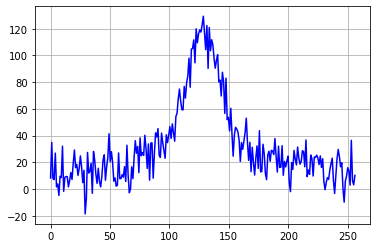

<ipython-input-13-4bc2838164ae>:18: DeprecationWarning: Using scipy.fft as a function is deprecated and will be removed in SciPy 1.5.0, use scipy.fft.fft instead.
  out = fft(ydata)


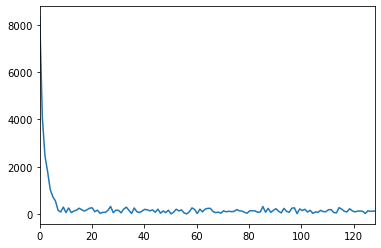

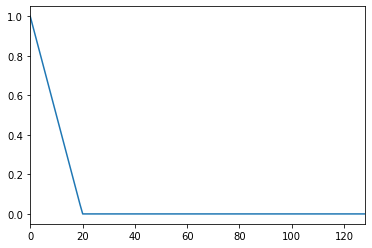

/Users/bob/opt/anaconda3/lib/python3.8/site-packages/numpy/core/_asarray.py:83: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)


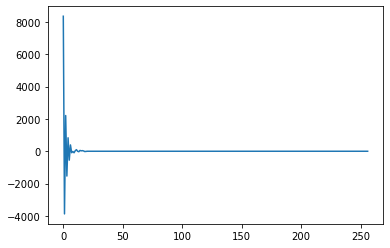

<ipython-input-13-4bc2838164ae>:45: DeprecationWarning: scipy.ifft is deprecated and will be removed in SciPy 2.0.0, use scipy.fft.ifft instead
  inved_data = ifft(filtered_out)
/Users/bob/opt/anaconda3/lib/python3.8/site-packages/numpy/core/_asarray.py:83: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)


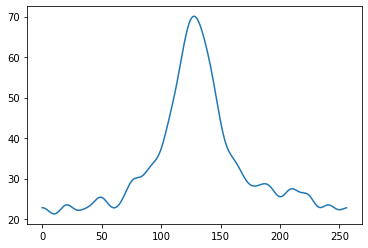

In [13]:
%matplotlib inline
from scipy import fft, ifft
import matplotlib.pyplot as plt
import numpy as np

def func(x):
    a,b,c,d=10, 40000, 380, 128
    return a+b/(c+(x-d)**2)

xdata = np.linspace(0, 256, 256)
y = func(xdata)
y_noise = 10 * np.random.normal(size=xdata.size)
ydata = y + y_noise
plt.plot(xdata, ydata, 'b-', label='data')
plt.grid()
plt.show()

out = fft(ydata)

def spectrum_power(x):
    re, im = x.real, x.imag
    return np.sqrt(re**2+im**2)

plt.plot(x,spectrum_power(out))
plt.xlim(0,128)
plt.show()

def filter(x):
    return (1-x/20)*np.piecewise(x, [x < 20, x >= 20], [1, 0])

plt.plot(x,filter(x))
plt.xlim(0,128)
plt.show()

filtered_out = []
for i in range(0, 256):
    y = out[i]
    re, im = y.real, y.imag
    yy = complex(filter(i)*y.real,filter(i)*y.imag)
    filtered_out.append(yy)

plt.plot(x,filtered_out)
plt.show()

inved_data = ifft(filtered_out)
plt.plot(x,inved_data)
plt.show()

# FFTの動作原理



このように便利なFFTであるが，どのような理屈で導かれるのか？　Fourier変換法は，この課題だけでも何回ものコマ数が必要なほどの内容を含んでいる．ここでは，
その基本となる考え方（のひとつ)だけを提示する．
1.  関数の内挿で導入した基底関数を直交関数系でとる．ところが，展開係数を逆行列で求める手法では計算が破綻．
1.  直交関係からの積分による係数決定．
1.  選点直交性による計算の簡素化．
1.  高速フーリエ変換アルゴリズムによる高速化．




# 関数内挿としてのFourier関数系



一連の関数系による関数の内挿は，基底関数を$\varphi_n(x)$として

$$
F(x) = \sum^N_{n=1}a_n \varphi_n(x)
$$
で得られることを見た．
Fourier変換では基底関数として$\varphi _{n} \left( x \right) =\sin \left( 2\,\pi {\it nx} \right) ,\,\cos \left( 2\,\pi {\it nx} \right)$をとる．関数の内挿法で示したように，この$x_i$での値$f_i, i=1 \cdots M$と，近似の次数($N$)とでつくる係数行列，

$$
A=\left[ \begin{array}{cccc}
\varphi_0(x_0)&\varphi_1(x_0)& \cdots &\varphi_N(x_0) \\
\vdots & \vdots & \vdots & \vdots \\
\varphi_0(x_M)&\varphi_1(x_M)& \cdots &\varphi_N(x_M) 
\end{array}\right]
$$
を求めて，係数$a_i$とデータ点$f_i$をそれぞれベクトルと考えると，

$$
\boldsymbol{A}.\boldsymbol{a} = \boldsymbol{f}
$$
から，通常の逆行列を求める手法で係数を決定することもできる．しかし，この強引な方法はデータ数，関数の次数が多い，フーリエ変換が対象としようとする問題では破綻する．もっといい方法が必要で，それが直交関数系では存在する．




# 直交関係からの積分による係数決定



関数の直交関係は，
$$
\int _{a}^{b}\varphi _{n} \left( x \right) \varphi _{m} \left( x \right) {dx}=
\delta_{\it mn}C_{n}= \left\{\begin{array}{lr}
C_m & at\, n=m \\
0 & at\, n\neq m
\end{array}\right.
$$
である．定数$C_m$は，$\sin,\cos$の三角関数系では次の通り．
```maple
> plot([sin(x),sin(3*x)],x=0..2*Pi);
```

![C10_FFTplot2d9.png](figs/C10_FFTplot2d9.png)


```maple
> plot([sin(x)*sin(3*x)],x=0..2*Pi, color=black);
```

![C10_FFTplot2d10.png](figs/C10_FFTplot2d10.png)


```maple
> int(sin(x)*sin(3*x),x=0..2*Pi);
```
$$
0
$$
```maple
> for i from 1 to 3 do for j from 1 to 3 do S:=int(sin(i*x)*sin(j*x),x=0..2*Pi);
> print(i,j,S); end do; end do:
```
$$
1, 1, \pi \notag \\
1, 2, 0 \notag \\
1, 3, 0 \notag \\
2, 1, 0 \notag \\
2, 2, \pi \notag \\
2, 3, 0 \notag \\
3, 1, 0 \notag \\
3, 2, 0 \notag \\
3, 3, \pi \notag
$$

$$
\int _{a}^{b}F \left( x \right) \varphi _{m} \left( x \right) {dx}
$$
を考える．先程の\ref{Eq:Orthogonal}式をいれると
$$
\int _{a }^{b }F \left(x \right)\varphi _{m }\left(x \right) dx =\int _{a }^{b }{\sum^N_{n=1} }a _{n }\varphi _{n }\left(x \right)\varphi _{m }\left(x \right)d x = 
\left\{\begin{array}{lr}
a_m C_m & at\, n=m \\
0 & at\, n\neq m
\end{array}\right.
$$
となる．こうして，係数$a_n$が

$$
a_{{n}}=\frac {1}{C_n}\int _{a}^{b} F \left( x \right) \varphi _{{n}} \left( x \right) {dx}
$$
で決定できる．




# 直接積分によるフーリエ係数



対象とする関数をまず作る．
```maple
> restart;
> #F:=x->piecewise(x=0,1/2,x>0,x); 
  #F:=x->piecewise(x<1/2,x,x>=1/2,1-x);
  #F:=x->piecewise(x<1/2,-1,x>1/2,1); 
  F:=x->piecewise(x<1/2,-1,x>=1/2,1);
  #F:=x->piecewise(x>0 and x<1/2,-1,x>1/2,1); 
  #F:=x->x-1/2; 
  plot(F(x),x=0..1);
```
$$
F := x \mapsto piecewise(x < \frac{1}{2}, -1, \frac{1}{2} \leq x, 1) 
$$

![C10_FFTplot2d11.png](figs/C10_FFTplot2d11.png)

piecewise関数は階段関数で，振る舞いはコメント(\#)を適当に外して確認せよ．
初期設定．
```maple
> KK:=3; N:=2^KK;L:=1-0;
> 2*Pi*1/L*x;
```
$$
2 \pi x
$$
```maple
> int(F(x)*cos(2*Pi*1/L*x),x=0..L);
```
$$
0
$$

```maple
> for n from 0 to N do
    a[n]:=2/L*int(F(x)*cos(2*Pi*n/L*x),x=0..L); 
  end do;
```
$$
a_0:=0 \notag \\
a_1:=0 \notag \\
a_2:=0 \notag \\
a_3:=0 \notag \\
a_4:=0 \notag \\
a_5:=0 \notag \\
a_6:=0 \notag \\
a_7:=0 \notag \\
a_8:=0 \notag 
$$

```maple
> for n from 0 to N do 
    b[n]:=2/L*int(F(x)*sin(2*Pi*n/L*x),x=0..L); 
  end do;
```
$$
b_0:=0 \notag \\
b_1:=\frac{4}{\pi} \notag \\
b_2:=0 \notag \\
b_3:=\frac{4}{3\pi} \notag \\
b_4:=0 \notag \\
b_5:=\frac{4}{5\pi} \notag \\
b_6:=0 \notag \\
b_7:=\frac{4}{7\pi} \notag \\
b_8:=0 \notag 
$$
ここで，オイラーの関係
$$
a[n]=c[n]+c[-n],\, b[n]=I (c[n]-c[-n]) \notag \\
c[-n]= \frac{1}{2} (a[n] + b[n]),\, c[n]=\frac{1}{2} (a[n] - I b[n])
$$
を使って，三角関数系から$\exp$へ変換する．

```maple
> for n from 0 to N do c[n]:=1/L*int(F(x)*exp(-I*2*Pi*n/L*x),x=0..L); end do;
> for n from 1 to N do c[-n]:=1/L*int(F(x)*exp(I*2*Pi*n/L*x),x=0..L); end do;
```
$$
c_0:=0 \notag \\
c_1:=\frac{2I}{\pi} \notag \\
c_2:=0 \notag \\
c_3:=\frac{2I}{3\pi} \notag \\
c_4:=0 \notag \\
c_5:=\frac{2I}{5\pi} \notag \\
c_6:=0 \notag \\
c_7:=\frac{2I}{7\pi} \notag \\
c_8:=0 \notag \\
c_{-1}:=-\frac{2I}{\pi} \notag \\
c_{-2}:=0 \notag \\
c_{-3}:=-\frac{2I}{3\pi} \notag \\
c_{-4}:=0 \notag \\
c_{-5}:=-\frac{2I}{5\pi} \notag \\
c_{-6}:=0 \notag \\
c_{-7}:=-\frac{2I}{7\pi} \notag \\
c_{-8}:=0 \notag 
$$

```maple
> F1:=unapply(sum(evalf(c[i]*exp(I*2*Pi*i/L*x)),i=-(N-1)..(N-1)),x):
> plot({Re(F1(x)),F(x)},x=0..1);
```

![C10_FFTplot2d12.png](figs/C10_FFTplot2d12.png)


```maple
> evalf(2/3/Pi);
```
$$
0.2122065907
$$
```

```




# 選点直交性による計算の簡素化



ところが，実際に積分していては，時間がかかりすぎる．直交関数系の選点直交性を使うとより簡単になる．




#### 直交関数系の選点直交性 


直交多項式は，

$$
\varphi _{n} \left( x \right) =0 \,at\,x_1,\,x_2,\,\cdots x_{n}
$$
である．$n-1$以下の次数$m,\,l$では，

$$
\sum _{i=1}^{n}\phi_{l} \left( x_{i} \right) \varphi _{m} \left( x_{i} \right) =\delta_{\it ml}C_{l}
$$
が成り立つ．これは，直交関係と違い積分でないことに注意．証明は略．
これを使えば，この先程の直交関数展開

$$
F \left( x \right) =\sum _{l=1}^{N}a_{l}\varphi _{l} \left( x \right)
$$
の両辺に$\varphi _{m} \left( x_{i} \right)$を掛けて$i$について和をとれば，
$$
\sum _{i=1}^{n} F \left(x _{i }\right)\phi _{m }\left(x _{i }\right) = \\
\sum _{i=1}^{n}  \sum _{l=1}^{N}a_{l}\varphi _{l} \left( x_{i} \right) \varphi _{m} \left( x_{i} \right)  \notag \\
=\sum _{l=1}^{N}  a_{l}\sum _{i=1}^{n}\varphi _{l} \left( x_{i} \right) \varphi _{m} \left( x_{i} \right) \notag \\
=\sum _{l=1}^{N}a_{l}\delta_{\it ml}C_{m}=a_{m}C_{m} \notag
$$
となる．つまり，

$$
a_{m}=\frac{1}{C_{m}} {\sum _{i=1}^{n}F \left( x_{i} \right) \varphi _{m} \left( x_{i} \right) }
$$
となり，単純な関数の代入とかけ算で係数が決定される．




## 選点直交性を用いた結果 


```maple
> KK:=4; N:=2^KK;L:=1-0;
> for k from 0 to N-1 do 
    c[k]:=evalf(sum(F(i*L/N)*exp(-I*2*Pi*k*i/N),i=0..N-1));
  end do;
```
```maple
c_0:=0. 
c_1:=-2.000000000 + 10.05467898 I 
c_2:=0. 
c_3:=-2.000000000 + 2.993211524 I 
c_4:=0. 
c_5:=-2.000000001 + 1.336357276 I 
c_6:=0. 
c_7:=-2.000000001 + 0.3978247331 I 
c_8:=0. 
c_9:=-2.000000001 - 0.3978247331 I 
c_10:=0. 
c_11:=-2.000000001 - 1.336357276 I 
c_12:=0. 
c_13:=-2.000000000 - 2.993211524 I 
c_14:=0. 
c_15:=-2.000000000 - 10.05467898 I
```

```maple
> F1:=unapply(sum(evalf(c[i]*exp(I*2*Pi*i/L*x)/N),i=0..(N/2-1))+
> sum(evalf(c[N-i]*exp(-I*2*Pi*i/L*x)/N),i=1..(N/2-1)),x):
> plot({Re(F1(x)),F(x)},x=0..1);
```

![C10_FFTplot2d13.png](figs/C10_FFTplot2d13.png)






# 高速フーリエ変換アルゴリズムによる高速化



$\sin, \cos$と$\exp$関数を結びつけるオイラーの関係を使うと，

$$
$$
と変換できる．これを使うと，

$$
c_{{k}}=\frac{1}{C_{{m}}}\sum _{i=0}^{N-1}F \left( x_{{i}} \right) {{\exp}\left({{\frac {-2\,\pi I}{N}}}\right)}
$$
となる．$N = 8$の場合を実際に計算すると，$ z = \exp(-\frac{2\pi}{8}I)$として，$z^8=1,z^9=z, \cdots$を使うと，

$$
\left[\begin{array}{c}
c_0\\c_1\\c_2\\c_3\\c_4\\c_5\\c_6\\c_7
\end{array}\right] =
\left[\begin{array}{cccccccc}
1&1&1&1&1&1&1&1\\
1&z&z^2&z^3&z^4&z^5&z^6&z^7\\
1&z^2&z^4&z^6&1&z^2&z^4&z^6\\
1&z^3&z^6&z&z^4&z^7&z^2&z^5\\
1&z^4&1&z^4&1&z^4&1&z^4\\
1&z^5&z^2&z^7&z^4&z^1&z^6&z^3\\
\vdots & & & & & & &  \\
\vdots & & & & & & & 
\end{array}\right]
\left[\begin{array}{c}
F_0\\F_1\\F_2\\F_3\\F_4\\F_5\\F_6\\F_7
\end{array}\right]
$$
となる．この行列計算を素直に実行すると，8×8=64回の演算が必要となる．これを減らせないかと考えたのが，高速フーリエ変換の始まりである．
この行列をよく見ると同じ計算を重複しておこなっていることが分かる．そこで，行列の左側と右側で同じ計算をしている部分をまとめると，

$$
\left[\begin{array}{c}
c_0\\c_1\\c_2\\c_3\\c_4\\c_5\\c_6\\c_7
\end{array}\right] =
\left[\begin{array}{cccccccc}
1&1&1&1&0&0&0&0\\
0&0&0&0&1&z&z^2&z^3\\
1&z^2&z^4&z^6&0&0&0&0\\
0&0&0&0&1&z^3&z^6&z\\
1&z^4&1&z^4&0&0&0&0\\
0&0&0&0&1&z^5&z^2&z^7\\
1&z^6&z^4&z^2&0&0&0&0\\
0&0&0&0&1&z^7&z^6&z^5\\
\end{array}\right]
\left[\begin{array}{c}
F_0+F_4\\F_1+F_5\\F_2+F_6\\F_3+F_7\\F_0-F_4\\F_1-F_5\\F_{[ \,\,]}-F_6\\F_{[\,\,]}-F_7
\end{array}\right]
$$
とすることができる．ここで，$z^4 =-1$などを使っている．右側のベクトルの計算でロスするが，行列の中の計算の回数を半分に減らすことができる．再度できあがった行列を見れば，同じ計算をさらにまとめるこ
とができそうである．こうして，次々と計算回数を減らしていくことが可能で，最終的に行列部分の計算が一切なくなる．残るのは，右側のベクトルの足し算引き算だけになる．

このベクトルの組み合わせは，一見相当複雑そうで，その条件分岐で時間がかかりそうに思われる．しかし，よく調べてみれば，単純なビット演算で処理することが可能であるこ
とが判明した．こうして，2の整数乗のデータの組に対しては，極めて高速にフーリエ変換を実行することが可能となった．
FFTでの演算回数は，データ数をNとすると

$$
N\log_2 N
$$
となる．単純な場合の$N^2$と比較すると，以下のようになり，どれだけ高速化されているかが理解されよう．
```maple
> dN2:=[]; dFft:=[]; for i from 2 to 16 do N:=2^i; n2:=N*N; Fft:=N/2*log[2](N);
> Fft/n2; printf("%10d %12d %12d %10.5f\n",N,n2,Fft,evalf(Fft/n2));
> dN2:=[op(dN2),[N,n2]]; dFft:=[op(dFft),[N,Fft]]; end do:
```
```maple
         4           16            4    0.25000
         8           64           12    0.18750
        16          256           32    0.12500
        32         1024           80    0.07812
        64         4096          192    0.04688
       128        16384          448    0.02734
       256        65536         1024    0.01562
       512       262144         2304    0.00879
      1024      1048576         5120    0.00488
      2048      4194304        11264    0.00269
      4096     16777216        24576    0.00146
      8192     67108864        53248    0.00079
     16384    268435456       114688    0.00043
     32768   1073741824       245760    0.00023
     65536   4294967296       524288    0.00012
```
```maple
> with(plots):
> l1:=plot(dN2): l2:=plot(dFft):
> display(l1,l2);
```

![C10_FFTplot2d14.png](figs/C10_FFTplot2d14.png)


```maple
> l1:=logplot(dN2): l2:=logplot(dFft):
> display(l1,l2);
```

![C10_FFTplot2d15.png](figs/C10_FFTplot2d15.png)


```maple
> l1:=loglogplot(dN2): l2:=loglogplot(dFft):
> display(l1,l2);
```

![C10_FFTplot2d16.png](figs/C10_FFTplot2d16.png)





# FFT関数を用いた結果



```maple
> KK:=4;
  N:=2^KK;i:='i';L:=1-0;
  x1:=array([evalf(seq(F(i/N),i=0..N-1))]);
  y1:=array([evalf(seq(0,i=0..N-1))]);
```
$$
{\it x1}\, := \, \left[ \begin {array}{cccccccccccccccc} - 1.0&- 1.0&- 1.0&- 1.0&- 1.0&- 1.0&- 1.0&- 1.0& 1.0& 1.0& 1.0& 1.0& 1.0& 1.0& 1.0& 1.0\end {array} \right] \notag \\
{\it y1}\, := \, \left[ \begin {array}{cccccccccccccccc}  0.0& 0.0& 0.0& 0.0& 0.0& 0.0& 0.0& 0.0& 0.0& 0.0& 0.0& 0.0& 0.0& 0.0& 0.0& 0.0\end {array} \right] \notag
$$
```maple
> FFT(KK,x1,y1);
```
$$
16
$$

```maple
> interface(displayprecision=2):
  print(x1);print(y1);
```
$$
\left[ \begin {array}{cccccccccccccccc}  0.0&- 2.0& 0.0&- 2.0& 0.0&- 2.0& 0.0&- 2.0& 0.0&- 2.0& 0.0&- 2.0& 0.0&- 2.0& 0.0&- 2.0\end {array} \right] \notag \\
\left[ \begin {array}{cccccccccccccccc}  0.0& 10.05& 0.0& 2.99& 0.0& 1.34& 0.0& 0.40& 0.0&- 0.40& 0.0&- 1.34& 0.0&- 2.99& 0.0&- 10.05\end {array} \right] \notag
$$

```maple
> F2:=unapply(sum(evalf((x1[i]+I*y1[i])*exp(I*2*Pi*(i-1)/L*x)/N),i=1..N/2)+
         sum(evalf((x1[N-i+2]+I*y1[N-i+2])*exp(-I*2*Pi*(i-1)/L*x)/N),i=2..N/2),x):
> plot({Re(F2(x)),F(x)},x=0..1);
```

![C10_FFTplot2d17.png](figs/C10_FFTplot2d17.png)






# 課題と解答例



## 合成波のFFT


下の例に従って，sin(i/13)とsin(i/2)の合成波を作成し，FFTをかけた後，周波数での強度を表示せよ．合成波(2*sin(i*2)+sin(i/2))との違いをのべよ．


![FFTExplot2d1.png](figs/FFTExplot2d1.png)



![FFTExplot2d2.png](figs/FFTExplot2d2.png)



![FFTExplot2d3.png](figs/FFTExplot2d3.png)

